# Engagement Curves

How many tasks students solve? How many days they return?

In [2]:
# Settings and imports.
%matplotlib inline
from collections import OrderedDict
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
import data

sns.set()
sns.set_context('poster')
sns.set_style('whitegrid')
pd.options.display.float_format = '{:.2f}'.format

# Preparing Data

In [3]:
ts = data.load('robomission-2018-03-10/task_sessions.csv')
# Only consider sessions with an interaction.
ts = ts[ts.time_spent > 0]
# Set maximum spent time to 1h.
ts.time_spent = ts.time_spent.clip_upper(60 * 60)
ts = ts.assign(date=ts.end.str[:10])
ts.head(2)

,student,task,solved,start,end,time_spent,date
id,,,,,,,
39,917,26,False,2017-11-13T10:58:19.666306Z,2017-11-13T10:59:21.969801Z,62,2017-11-13
28,584,41,True,2017-11-12T08:57:39.741460Z,2017-11-12T08:58:43.087657Z,63,2017-11-12


In [4]:
tasks = data.load('robomission-2018-03-10/tasks.csv')
levels = data.load('robomission-2018-03-10/levels.csv')

# Students - Tasks
How many students solved this many tasks:

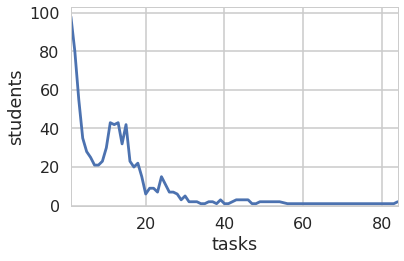

In [9]:
solved_ts = ts[ts.solved]
n_solved_ts = solved_ts.groupby('student').task.nunique()
solved_ts_count = n_solved_ts.groupby(n_solved_ts).count()
ax = solved_ts_count.plot()
ax.set_ylim(bottom=0)
ax.set_xlabel('tasks')
ax.set_ylabel('students')
plt.tight_layout()
plt.savefig('../img/engagement-tasks.pdf')

# Students - Days
How many students solved a task this many distinct days:

In [17]:
days_count[days_count.index >= 2].sum()

102

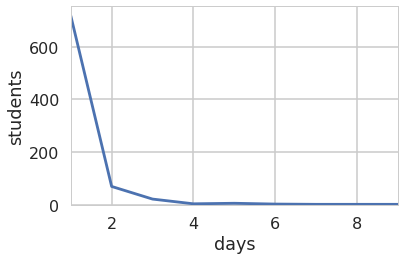

In [10]:
solved_ts = ts[ts.solved]
n_days = solved_ts.groupby('student').date.nunique()
days_count = n_days.groupby(n_days).count()
ax =days_count.plot()
ax.set_ylim(bottom=0)
ax.set_xlabel('days')
ax.set_ylabel('students')
plt.tight_layout()
plt.savefig('../img/engagement-days.pdf')